# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [3]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [4]:
"""
1. We need to load the first MID1.xls as DataFrame and use its name as indexes and the name of the document as column
2. Load the 8 next MID@I.xls and join them with the first DataFrame (some more line indexes will be added to the DataFrame too)
3. Load the metadata from the last file, and map the column name [MID1,MID2,...,MID9] to a MultiIndex: [(MID1,EC,NAN),(MID2,NEC1,tissue),...]
4. Change all the NaN created by the join operation to the tag 'unknown'
"""

"helper function to load one excel of the name MID@i"
def getMID(i):
    return pd.read_excel(DATA_FOLDER+"/microbiome/MID"+str(i)+".xls",index_col=0, sheetname='Sheet 1', header=None, names = ['MID'+str(i)])

"load all the MID.xls and join them together"
a = getMID(1)
for i in range(2,10):
    m = getMID(i)
    a = a.join(m, how='outer')
    
"split the full name of the bacterie into multiIndex"
#a.index = pd.MultiIndex.from_tuples([tuple(k.split(" ")) for k,v in a.iterrows()]) 

"load the metadata from metadata.xls"
metadata = pd.read_excel(DATA_FOLDER+"/microbiome/metadata.xls",index_col=0, sheetname='Sheet1')

"create a list of tuples from each line of the metadata"
columns = list(metadata.itertuples(index=True))

"change the column name to its real tuple name in a MultiIndex"
a.columns=pd.MultiIndex.from_tuples(columns)

"check the uniqueness of the indexes"
print("all indexes are uniques =",a.index.is_unique)

"remplace NaN to unknown"
a = a.fillna('unknown')

"print the dataFrame"
a

all indexes are uniques = True


,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
,EXTRACTION CONTROL,NEC 1,Control 1,NEC 2,Control 2,NEC 1,Control 1,NEC 2,Control 2
,NaN,tissue,tissue,tissue,tissue,stool,stool,stool,stool
0,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",unknown,2,1,unknown,5,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",unknown,14,15,unknown,26,unknown,1,unknown,1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",unknown,unknown,unknown,unknown,1,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",unknown,1,4,unknown,5,1,2,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus",unknown,unknown,1,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",unknown,2,1,unknown,2,unknown,1,unknown,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [5]:
import matplotlib.pyplot as plt
import re
from functools import reduce
from math import isnan
import numbers

from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

# FAQ - HW1 - https://docs.google.com/document/d/1P16ezd52JG5LjH7yd9GRoO6InYA5h3lWOlBkbxlKmuk/edit

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [6]:
# Load data
data_names = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
dataset = pd.read_excel(DATA_FOLDER+"/titanic.xls", index_col=None, names=data_names)


# Pre-process data

# Some cleaning before discussing the data, so that we can, for example, describe dataset['ticket'] as a number and not as a string 
# just because some rows hold 'PC343445' instead of '343445

# Category dictionnary for pclass, survived
cat_pclass = {1:"1st class", 2:"2nd class", 3:"3rd class"}
cat_survived = {0 : "Died", 1:"Survived"}

# Categorize Sex
cat_sex = {0 : 'Female', 1 : 'Male'}
def categorize_sex(s, verbose=True) : 
    if s.lower() == 'female' : return 0
    elif s.lower() == 'male' : return 1
    else :
        if verbose : print('sex - NaN - Couldn\'t categorize :', s)
        return float('NaN')
dataset['sex'] = dataset['sex'].apply(categorize_sex)

# Keep only the numbers in dataset['ticket']
def process_ticket(s, verbose=False ) : 
    if type(s) is int : 
        return s
    elif type(s) is str and s.isdigit():
        return int(s)
    elif type(s) is str :
        res = re.search('\s\d\d', s)  # regex find first digit
        if res and s[res.start()+1:].isdigit() :
            return int(s[res.start()+1:])
        else :
            if verbose : print("tickets - NaN - erratic regex matched: ", s)
            return float('NaN')
    else : 
        if verbose :print("tickets - NaN - matched default case : ", s)
        return float('NaN')
dataset['ticket'] = dataset['ticket'].apply(process_ticket)

# Process cabins
#__cabin__ : String - cabin number - indicated the number of the cabin, and the deck it is located on (profile, boat deck, A-G deck, Orlop deck, tank top).  
# https://www.encyclopedia-titanica.org/cabins.html
# https://www.reference.com/education/many-floors-did-titanic-1ee686f0a1ffe96d
def process_cabin(s, verbose=False) : 
    """  Extracts the floor form the cabin numbers
         Then categorizes it"""
    if not type(s) is str :
        if verbose : print('cabins - empty string - didn\'t match string on : ', s)
        return 0
    floor=''
    res = re.findall('[A-Za-z][A-Za-z]*\d\d*', s) # match 1+ char followed by 1+ digit
    if len(res) > 1 :
        def reduce_floors(r1, r2) : 
            """ Checks that all listed cabin numbers for a passenger are on the same floor
                 and returns that floor"""
            floor1 = re.findall('[A-Za-z][A-Za-z]*', r1)[0] # match only the first 1+ chars
            floor2 = re.findall('[A-Za-z][A-Za-z]*', r2)[0]
            if floor1 == floor2 :
                return floor1
            else : 
                # this case never happens - checked with verbose=True
                if verbose : print('cabins - cabins aren\'t on the same floor : ', res)
                return ''
        floor = reduce(reduce_floors, res)
    elif len(res) > 0 :
        # there is necessarily exactly 1  match 
        floor = re.findall('[A-Za-z][A-Za-z]*', res[0])[0] 
    # else floor=''
    # Categorizations
    return { # switch statement equivalent
        'A' : 1,
        'B' : 2,
        'C' : 3,
        'D' : 4,
        'E' : 5,
        'F' : 6,
        'G' : 7,
        'T' : 8
    }.get(floor, 0)
cat_cabin = {0 : 'Unknown Deck', 1 : 'Deck A', 2 : 'Deck B', 3 : 'Deck C', 4:'Deck D', 5:'Deck E', 6:'Deck F', 7:'Deck G', 8:'Boat Deck'}
dataset['cabin'] = dataset['cabin'].apply(process_cabin)

# Process embarked
cat_embarked = {0 : 'Cherbourg', 1:'Queensland', 2:'Southampton'}
def tmp(c)  :  # Lambda function gives invalid syntax for some reason
    #lambda c : return {
    return {
        'C':0,
        'Q':1,
        'S':2
    }.get(c, float('NaN'))
dataset['embarked'] = dataset['embarked'].apply(tmp)

# Check the content of columns 
def check_for_all(serie, predicate) :
    """ Predicate must be a function that maps the serie's elements to boolean
    """
    assert reduce(lambda x, y : x and y, serie.map(predicate))
check_for_all(dataset['sibsp'], (lambda e : isnan(e) or e%1==0))
check_for_all(dataset['parch'], (lambda e : isnan(e) or e%1==0))
check_for_all(dataset['fare'], (lambda e : isnan(e) or isinstance(e, numbers.Real)))
check_for_all(dataset['body'], (lambda e : isnan(e) or e%1==0))

#print(dataset)
dataset.describe()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1.301000e+03,1308.000000,1309.000000,1307.000000,121.000000
mean,2.294882,0.381971,0.644003,29.881135,0.498854,0.385027,2.848119e+05,33.295479,0.735676,1.492731,160.809917
std,0.837836,0.486055,0.478997,14.413500,1.041658,0.865560,6.369570e+05,51.758668,1.539625,0.814626,97.696922
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,2.510000e+02,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,1.425800e+04,7.895800,0.000000,1.000000,72.000000
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,1.113200e+05,14.454200,0.000000,2.000000,155.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,0.000000,3.470770e+05,31.275000,0.000000,2.000000,256.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,3.101317e+06,512.329200,7.000000,2.000000,328.000000


## 1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical. ##

If 'Categorical' is not specified, please assume a non categorical attribute.  
For all categorical attributes, a category dictionnary has been created in the pre-processing step

__pclass__ :  
Description : The travelling class of a passenger : 1st, 2nd or 3rd class    
Type : Categorical -> stored as Integer    
Range : {1 - 3};   
 

__survived__ :   
Description : Wether or not the passenger survived the crash.   
Type : Categorical -> stored as integer   
Range : {0, 1}  
  
__name__ :  
Description : All name-related informations (name, surname, 2nd and 3rd name) and title (mr, ms, ...) of the passenger.    
Type : string  
Range :              --------------------------------  
  
__sex__ :   
Description : sex of the passenger (male or female)  
Type : Categorical -> stored as an integer  
Range : {0, 1}  
  
__age__ :   
Description : Age of the passenger.  
Type : float  
Range : [0.167, 80]  
  
__sibsp__ :       
Description : Number of siblings / spouses aboard the boat  
Type : integer  
Range : {0-8}  
  
__parch__ :     
Description : Number of parent / children aboard  
Type : integer  
Range : {0-9}  
  
__ticket__ :   
Description : Ticket number of the passenger  
Type : Integer (originally string)  
Range : {251 - 3101317}   
  
__fare__ : Float. number or ### - amount of money the passenger payed for its ticket    
Description : Amount of money payed for the ticket    
Type : float  
Range : [0, 512.3292]  
    
__cabin__ :   
Description : Cabin number a passenger - contains the floor (deck) number. Based on the informations we need, we kept only the floor number  
Type : Categorical -> integer (originally string)  
Range : {0 - 8}  - meaning {unknown, deck A, deck B, ... deck G, boat deck}
  
__embarked__ :   
Description : Port the passenger embarked from  
Type : Categorical -> Integer (originally, char)  
Range : {0 - 2}  
  
__boat__ :     
Description :       ----------------------------  
Type :       ----------------------------  
Range :       ----------------------------  
  
__body__ :   
Description : Uniquely identifies a recovered body  
Type : Integer  
Range : {1 - 328}  
  
__home.dest__ :    
Description : Home and destination of the passenger, separated by a /   
Type : String  
Range :      ----------------------------  



## Futher assumptions

1. It's fine to have floating point number as ages. We will treat it as "fraction of years", i.e a person that is 6.5 is 6 years and 6 months old  
2. Given the fact that we were only interested in the cabin floor, we took some liberty with the dataset['cabin'] and kept only the floor number  
3. We didn't touch dataset['boat'] not dataset['home.dest'] since we don't need them to answer any questions  
  
    

## 2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.
  
   


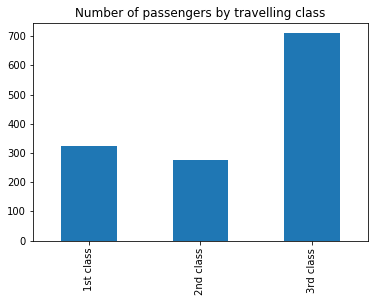

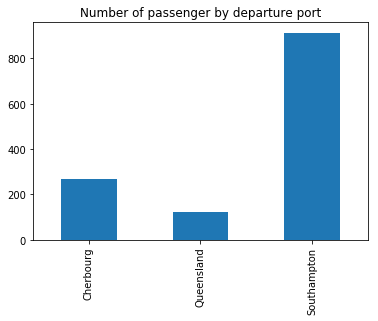

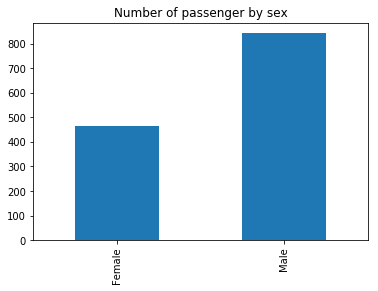

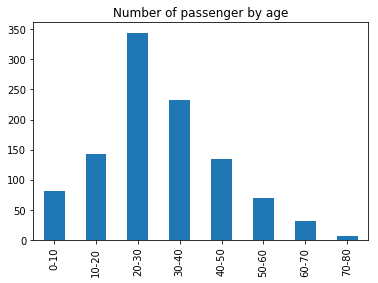

In [7]:
## Passengers' travel class histogram
fig_pclass = plt.figure()
pclass_data = dataset['pclass']
pclass_count = pd.Series([pclass_data[pclass_data.values==pclass].apply(lambda e : 1).sum() for pclass in cat_pclass.keys()])
pclass_count.index=cat_pclass.values()
pclass_count.plot(kind='bar', title='Number of passengers by travelling class')


## Passengers' embarkation port
fig_embark = plt.figure()
embarked_data = dataset['embarked']
embarked_count = pd.Series([len(embarked_data[embarked_data.values==port]) for port in cat_embarked.keys()])
embarked_count.index = cat_embarked.values()
embarked_count.plot(kind='bar', title='Number of passenger by departure port')
# to check the order of the results 
#print(cat_embarked)
#print(len(embarked_data[embarked_data.values==2]))


## Passengers' sex
fig_sex = plt.figure()
sex_data = dataset['sex']
sex_count = pd.Series([len(sex_data[sex_data.values==gender]) for gender in cat_sex.keys()])
sex_count.index = cat_sex.values()
sex_count.plot(kind='bar', title='Number of passenger by sex')
# to check the order of the results 
#print(cat_sex)
#print(len(sex_data[sex_data.values==1]))

## Passenger's age
fig_age = plt.figure()
age_data = dataset['age']
decades = np.arange(10, 90, 10)
# for each decade, map to boolean values with 'e -> return e in [decade-10, decade[', then use the result as an index to splice age_data
decades_count = pd.Series([ len(age_data[age_data.map(lambda e : e < decade and e >= decade -10)]) for decade in decades])
decades_count.index = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
# to check results
#dec = 20
#print(dec, "- -> ", len(age_data[age_data.map(lambda e : e < dec and e >= dec -10)]))
#print(decades_data)
#print( decades_data.sum())
decades_count.plot(kind='bar', title='Number of passenger by age')

plt.show()

## 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.





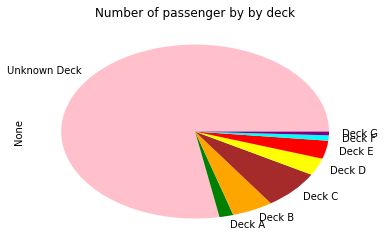

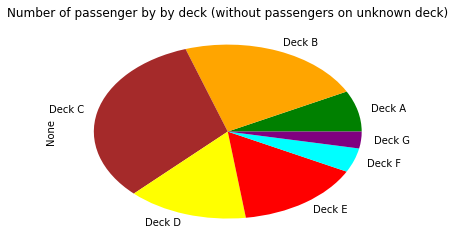

In [8]:
floors_data = dataset['cabin']
floors_count = pd.Series([len(floors_data[floors_data.values == floor]) for floor in cat_cabin.keys()])
floors_count.index = cat_cabin.values()

# for verifications
#print(cat_cabin)
#print(floors_count, "\n sum : ", sum(floors_count))
#floor = 3
#print(cat_cabin[floor], " : ", len(floors_data[floors_data.values == floor]))

floors_prop = floors_count / floors_count.sum()
#print("floor proportions \n", floors_prop, " sum should be 1 : ", floors_prop.sum())
floors_prop_no_unknown = (floors_count / floors_count[1:].sum())[1:]
#print("floor proportions no onknown\n", floors_prop_no_unknown, " sum should be 1 : ", floors_prop.sum())
colors = ['pink', 'green', 'orange', 'brown', 'yellow', 'red', 'cyan', 'purple']

fig = plt.figure()
floors_prop.plot(kind='pie', title='Number of passenger by by deck', colors=colors)

fig_no_unknown = plt.figure()
floors_prop_no_unknown.plot(kind='pie', title='Number of passenger by by deck (without passengers on unknown deck)', colors=colors[1:])

plt.show()

## 4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

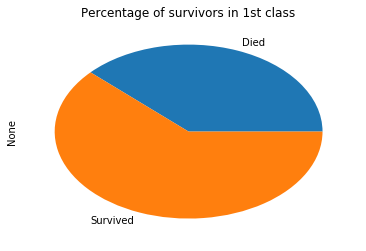

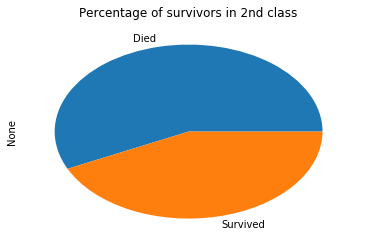

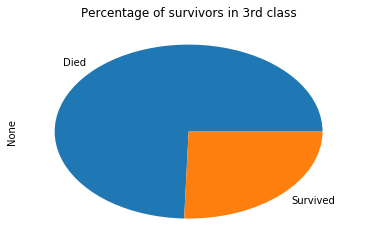

In [9]:
ps_data = dataset[['pclass', 'survived']]

# calculate percentage of survivors
# looped solution - for reference
#for pclass in cat_pclass :
#    # build index of survivors in the passenger class
#    survivors = ps_data[ps_data['survived'].map(lambda e : e==1) & ps_data['pclass'].map(lambda e : e==pclass) ]
#    deads = ps_data[ps_data['survived'].map(lambda e : e==0) & ps_data['pclass'].map(lambda e : e==pclass) ]
#    surv_prop = len(survivors) / (len(deads)+ len(survivors))
#    print(surv_prop)
survivors = pd.Series([ len(ps_data[ps_data.apply((lambda row : row['pclass']==pclass and row['survived']==1), axis=1)]) 
                           for pclass in cat_pclass.keys() ] )
survivors.index = cat_pclass.values()

# for each % class, add the percentage of deads and do a nice pie plot
#print(cat_survived)
for pclass in cat_pclass.keys() :
    fig = plt.figure()
    cl_survivors = survivors[pclass-1]
    cl_travellers = len(ps_data[ps_data['pclass']==pclass]) 
    cl_survivors_serie = pd.Series([cl_travellers-cl_survivors, cl_survivors])
    cl_survivors_serie.index = cat_survived.values()
    title = 'Percentage of survivors in ' + cat_pclass[pclass]
    cl_survivors_serie.plot(kind='pie', title=title)

plt.show()    

## 5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:25: PerformanceWarning: indexing past lexsort depth may impact performance.


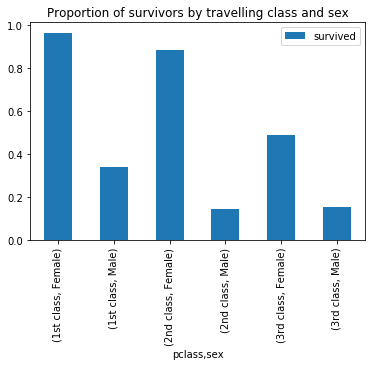

In [91]:
scs = dataset[['pclass', 'sex']]
scs.set_index(['pclass', 'sex'])
#print(scs)

# This time we will modify the dataset, so we make a copy and build a multiindex
ds = (dataset.copy())[['pclass', 'sex', 'survived']]
ds['pclass'] = ds['pclass'].apply(lambda e : cat_pclass.get(e))
ds['sex'] = ds['sex'].apply(lambda e : cat_sex.get(e))
ds = ds.set_index(['pclass', 'sex'])

# Create a data structure for the results
res = pd.DataFrame( np.transpose([ ["1st class", "1st class", "2nd class", "2nd class", "3rd class", "3rd class"], 
                                                      ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'], 
                                                      [0, 0, 0, 0, 0, 0]]),
                                columns=['pclass', 'sex', 'survived'])
res = res.set_index(['pclass', 'sex'])

# Compute results
for i in set(res.index):
    res.loc[i] = ds.loc[i].sum() / ds.loc[i].size

# plot    
res.plot(kind='bar', title='Proportion of survivors by travelling class and sex')
plt.show()


## 6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.


In [233]:
subset = dataset[['pclass', 'sex', 'age', 'survived']].copy()

# We use quantile to get a feel for the data. 
# Comparing [18-21] and [39-45] would be interresting, as these are relatively compact age groups
# representing the beggining and the middle of the adult age.
#print( dataset['age'].quantile(np.arange(0, 1, 0.05)) )

# filter by age and make sure we've got equally sized age categories and set index
cat_age = {0 : "18-21", 1:"39-45"}
subset = subset[subset.age.apply(lambda age : (age>=18 and age<=21) or (age>=39 and age<=45))]
subset['age'] = subset['age'].apply(lambda age : 0 if age<=21 else 1)
sample_size = min(subset[subset.age.apply(lambda age : (age>=18 and age<=21))].size, subset[subset.age.apply(lambda age : (age>=39 and age<=45))].size)




/usr/lib/python3.6/site-packages/ipykernel/__main__.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.


ValueError: Wrong number of items passed 12, placement implies 246

,A,B,C
sum,-1.911118,-0.244532,2.593421
min,-0.988501,-1.013742,-0.915358
